In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [31]:
#CASE    = "0110"

CASE = "0144"

SIM     = "sim_wom_rcr_real"

#PATH = "aorta"  
#PATH = "right_iliac"

#PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
#PATH = "renal_left"
#PATH = "renal_right"
PATH = "SMA"

CSV     = "/media/marsdenlab/Data1/UQ/"+CASE+"/"+SIM+'/csv/'+PATH+".csv"

generation = 3 
mesh       = 'coarse'

OUTPUT = os.path.join("/media/marsdenlab/Data1/UQ/"+CASE,SIM,
                       str(generation),PATH)

quants = [
 "pressure_0",
 "velocity_3",
 "vWSS_3_boundary"   
]

labels = [
  r"pressure $(mmHg)$",
  r"Velocity magnitude $(cm/s)$",
  r"TAWSS magnitude $(dyne/cm^2)$"
]

BOOT_ROUNDS = 100

df = pd.read_csv(CSV)

df['pressure_0'] = df['pressure_0']/1333

point = df['point'].unique()[-1]

data = df.loc[(df['mesh']==mesh) & (df['generation']==generation) & (df['point']==point)]

models = list(data['model'].unique())
x      = list(data['time'].unique())

Nx = len(x)
Nm = len(models)

print(df.columns)
print(Nm,' models')
print(Nx,' points')

Index(['Unnamed: 0', 'area', 'generation', 'length', 'mesh', 'model', 'nx',
       'ny', 'nz', 'path', 'point', 'pressure_0', 'pressure_0_boundary',
       'radius_actual', 'radius_supplied', 'time', 'vWSS_0', 'vWSS_0_boundary',
       'vWSS_1', 'vWSS_1_boundary', 'vWSS_2', 'vWSS_2_boundary', 'vWSS_3',
       'vWSS_3_boundary', 'velocity_0', 'velocity_0_boundary', 'velocity_1',
       'velocity_1_boundary', 'velocity_2', 'velocity_2_boundary',
       'velocity_3', 'velocity_3_boundary', 'x', 'y', 'z'],
      dtype='object')
44  models
41  points


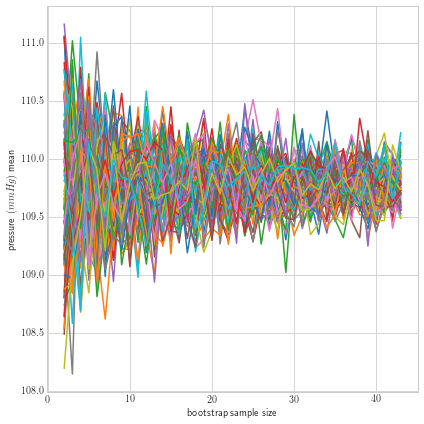

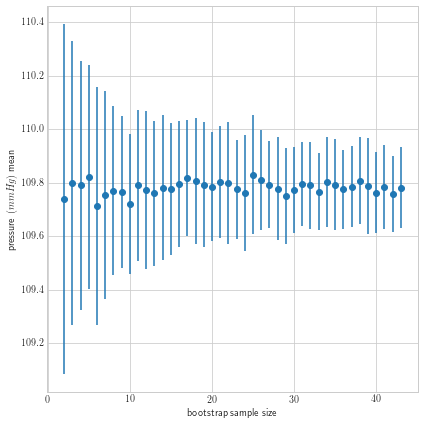

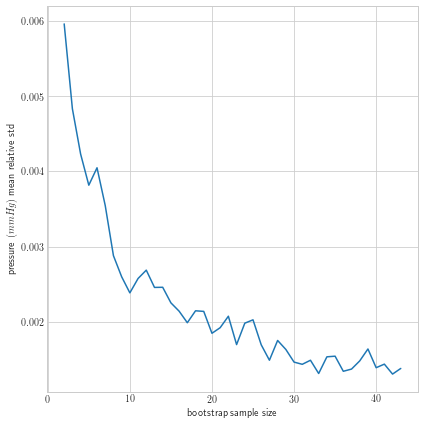

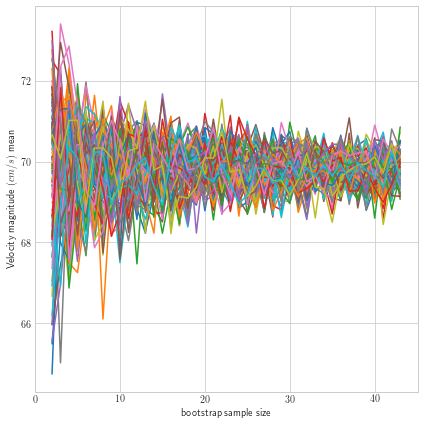

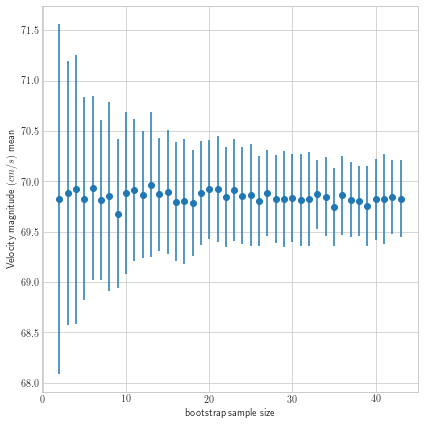

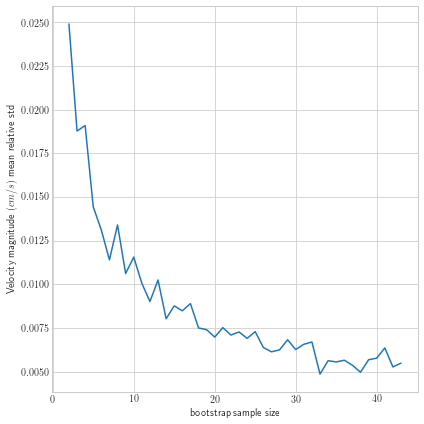

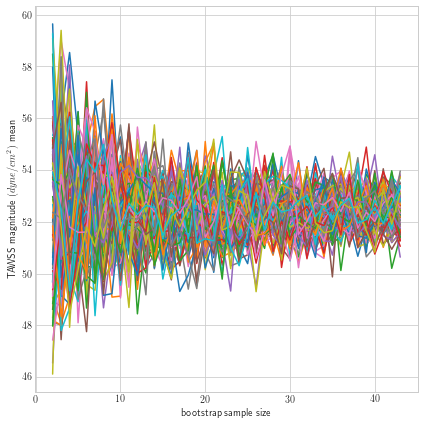

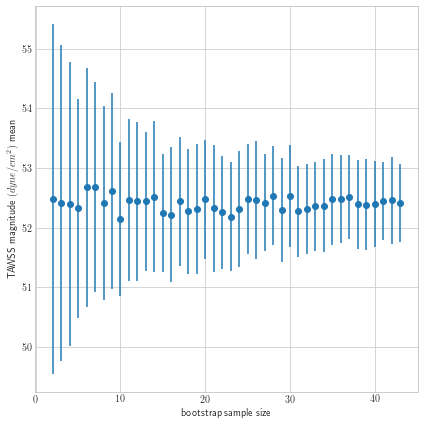

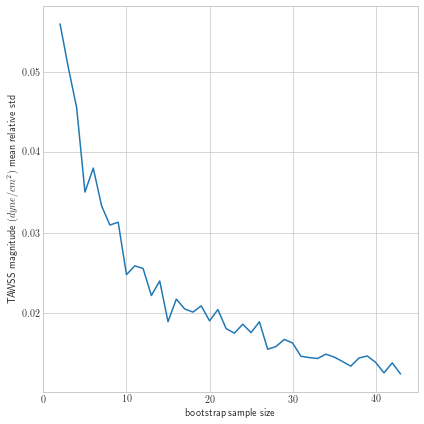

In [32]:
for quant,label in zip(quants,labels):

    Y  = np.zeros((Nm,Nx))
    for i,mo in enumerate(models):
        y    = data.loc[data['model']==mo][quant].values
        Y[i] = y

    MAT = np.zeros((Nm-2,BOOT_ROUNDS))
    inds    = np.arange(Nm)
    BOOT_INDS = range(2,Nm)
    for i in BOOT_INDS:
        for j in range(BOOT_ROUNDS):
            boot_inds = np.random.choice(inds, size=i)
            data_ = Y[boot_inds]
            v     = np.mean(data_,axis=1)
            v_bar = np.mean(v)

            MAT[i-2,j] = v_bar

    mu  = np.mean(MAT,axis=1)
    std = np.std(MAT,axis=1)
    rel_std = std/mu

    plt.figure(figsize=(6,6))
    #plt.title('generation ' + str(generation))
    plt.plot(BOOT_INDS, MAT)
    plt.ylabel(label + ' mean')
    plt.xlabel('bootstrap sample size')
    plt.tight_layout()
    plt.savefig(OUTPUT+'/converge_mean_{}.pdf'.format(quant),dpi=300)
    plt.show()
    plt.close()

    plt.figure(figsize=(6,6))
    #plt.title('generation ' + str(generation))
    plt.errorbar(BOOT_INDS, y=mu, yerr=std, fmt='o')
    plt.ylabel(label + ' mean')
    plt.xlabel('bootstrap sample size')
    plt.tight_layout()
    plt.savefig(OUTPUT+'/converge_std_{}.pdf'.format(quant),dpi=300)
    plt.show()
    plt.close()

    plt.figure(figsize=(6,6))
    #plt.title('generation ' + str(generation))
    plt.plot(BOOT_INDS, rel_std)
    plt.ylabel(label +' mean relative std')
    plt.xlabel('bootstrap sample size')
    plt.tight_layout()
    plt.savefig(OUTPUT+'/converge_rel_std_{}.pdf'.format(quant),dpi=300)
    plt.show()
    plt.close()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


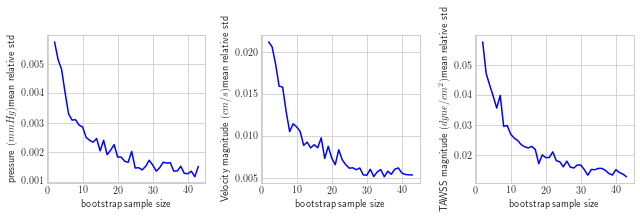

In [33]:
Size  = 3
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))

for quant,label in zip(quants,labels):

    Y  = np.zeros((Nm,Nx))
    for i,mo in enumerate(models):
        y    = data.loc[data['model']==mo][quant].values
        Y[i] = y

    MAT = np.zeros((Nm-2,BOOT_ROUNDS))
    inds    = np.arange(Nm)
    BOOT_INDS = range(2,Nm)
    for i in BOOT_INDS:
        for j in range(BOOT_ROUNDS):
            boot_inds = np.random.choice(inds, size=i)
            data_ = Y[boot_inds]
            v     = np.mean(data_,axis=1)
            v_bar = np.mean(v)

            MAT[i-2,j] = v_bar

    mu  = np.mean(MAT,axis=1)
    std = np.std(MAT,axis=1)
    rel_std = std/mu
    
    axarr[count].plot(BOOT_INDS,rel_std, color='b')
    axarr[count].set_xlabel("bootstrap sample size")
    axarr[count].set_ylabel(label +'mean relative std')
    axarr[count].legend()

    count+=1
          
plt.tight_layout()
plt.savefig(OUTPUT+'/converge_rel_std.png',dpi=300)
plt.savefig(OUTPUT+'/converge_rel_std.pdf',dpi=200)

plt.show()
plt.close()